In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('results/NOAAWeather/BayesianNonparametricDetectionMethod_full-test.csv')
df.head()

,seed,const,max_depth,n_samples,threshold,lpd (ht),lpd (nb),acc (ht-no dd),acc (nb-no dd),acc (ht-dd),acc (nb-dd),f1 (ht-no dd),f1 (nb-no dd),f1 (ht-dd),f1 (nb-dd),drifts
0,1731576879,0.5,2,100,0.45,0.000502,0.000546,0.665437,0.665657,0.710596,0.714781,0.641924,0.642268,0.625107,0.680226,"[199, 399, 599, 799, 999, 1199, 1399, 1599, 17..."
1,1731576886,0.5,2,100,0.50,0.000502,0.000546,0.665437,0.665657,0.710596,0.714781,0.641924,0.642268,0.625107,0.680226,"[199, 399, 599, 799, 999, 1199, 1399, 1599, 17..."
2,1731576893,0.5,2,100,0.55,0.000502,0.000546,0.665437,0.665657,0.710596,0.714781,0.641924,0.642268,0.625107,0.680226,"[199, 399, 599, 799, 999, 1199, 1399, 1599, 17..."
3,1731576900,0.5,2,250,0.45,0.001173,0.000915,0.665437,0.665657,0.707677,0.698590,0.641924,0.642268,0.640946,0.673506,"[499, 999, 1499, 1999, 2499, 2999, 3499, 3999,..."
4,1731576906,0.5,2,250,0.50,0.001209,0.000932,0.665437,0.665657,0.708944,0.699196,0.641924,0.642268,0.640967,0.674259,"[499, 999, 1499, 1999, 2499, 2999, 3499, 3999,..."


<AxesSubplot: >

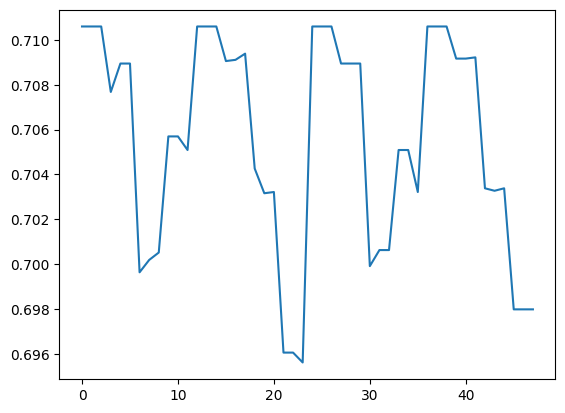

In [7]:
df['acc (ht-dd)'].plot()

In [8]:
df_synt = pd.read_csv('datasets/files/SYNTHETIC.csv')
df_synt.head()

,attribute1,attribute2,attribute3,attribute4,class
0,20.574521,76.517820,6.893218,4.120557,0
1,10.940378,85.601712,7.847297,4.829055,0
2,10.868209,93.338341,5.106202,2.937839,0
3,17.182718,91.360732,6.521912,0.000000,0
4,11.615819,68.968915,5.293550,1.619728,0


In [ ]:
df_synt.info()

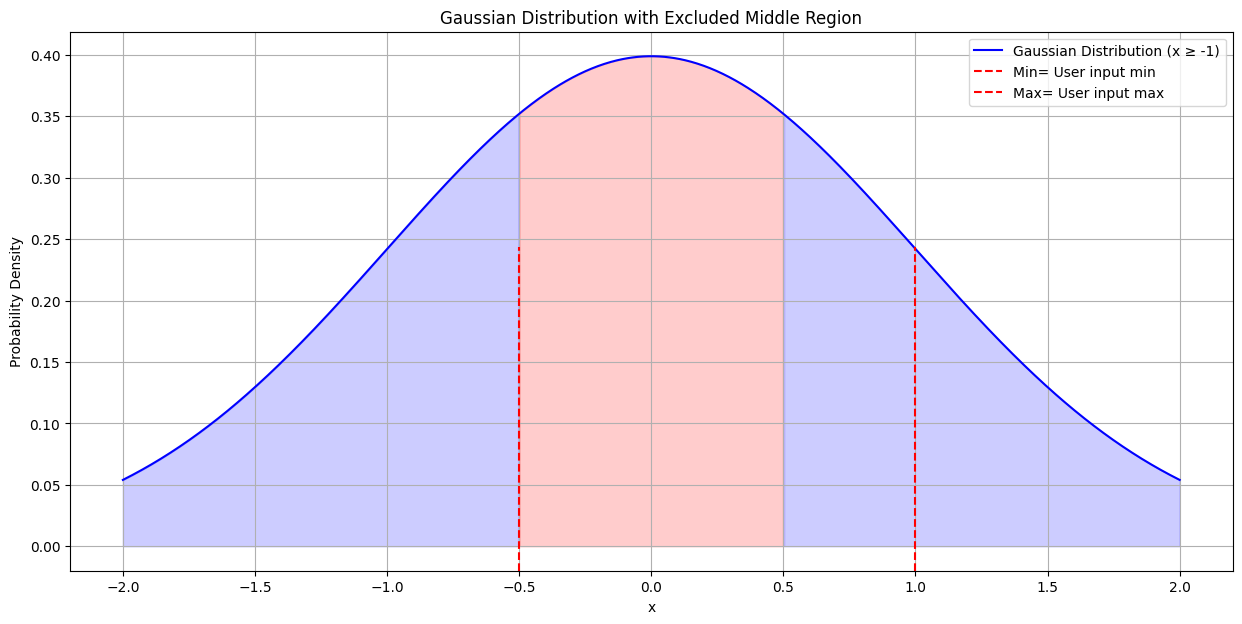

In [47]:
import numpy as np

import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-2, 2, 1000)

# Compute the Gaussian probability density function
y = 1/np.sqrt(2*np.pi) * np.exp(-0.5 * x**2)

cut_min = -0.5
cut_max = 0.5

plt.figure(figsize=(15, 7))
plt.plot(x, y, color='blue', label='Gaussian Distribution (x ≥ -1)')
plt.fill_between(x[(x > cut_min) & (x < cut_max)], 0, y[(x > cut_min) & (x < cut_max)], color='red', alpha=0.2)
plt.fill_between(x[x < cut_min], 0, y[x < cut_min], color='blue', alpha=0.2)
plt.fill_between(x[x > cut_max], 0, y[x > cut_max], color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axvline(x=cut_min, color='red', linestyle='--', label=f'Min= User input min', ymin=0, ymax=0.6)
plt.axvline(x=1, color='red', linestyle='--', label=f'Max= User input max', ymin=0, ymax=0.6)
plt.title('Gaussian Distribution with Excluded Middle Region')
plt.legend()
plt.grid(True)
plt.show()

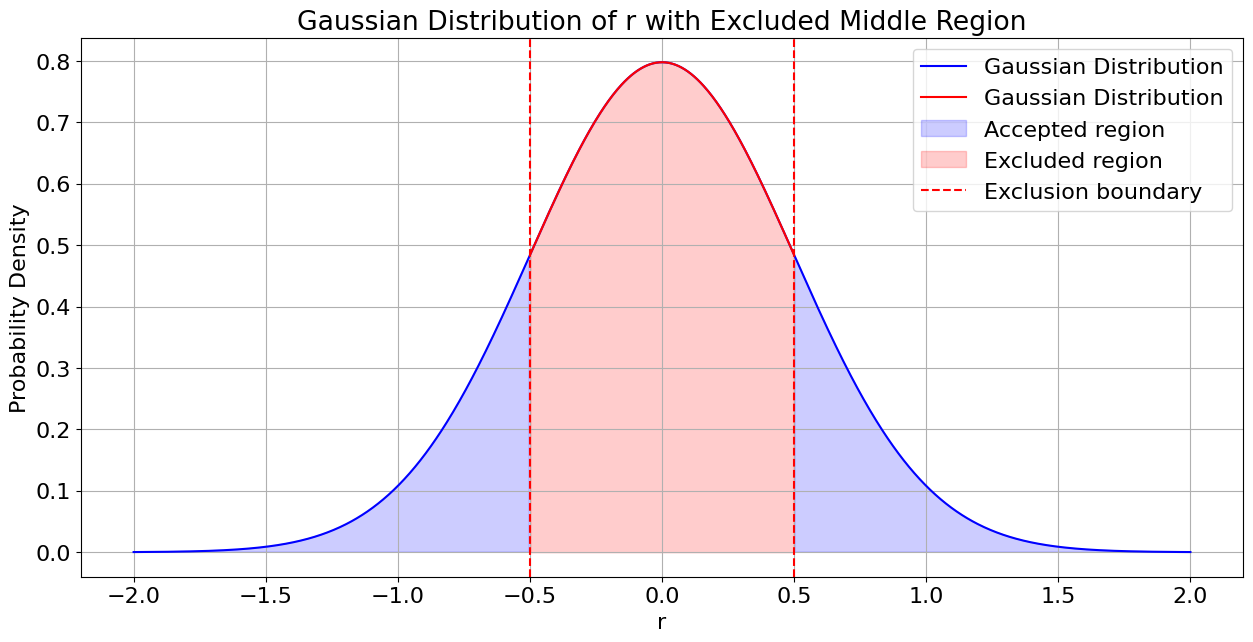

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters matching sample_excluding_middle
loc = 0 # 0.3
scale = 0.5
lower = -0.5
upper = 0.5

# Set a default font size for all elements
plt.rcParams.update({'font.size': 16})

# Generate x values over a range that captures most of the density
x = np.linspace(-2, 2, 1000)

# Compute the Gaussian PDF for the given parameters:
# PDF(x) = 1/(scale * sqrt(2*pi)) * exp(-0.5 * ((x - loc)/scale)**2)
y = (1/(scale * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - loc)/scale)**2)

plt.figure(figsize=(15, 7))
plt.plot(x, y, color='blue', label='Gaussian Distribution')
plt.plot(x[(x > lower) & (x < upper)], y[(x > lower) & (x < upper)], color='red', label='Gaussian Distribution')

# Fill the accepted region (outside the middle interval) with a blue shade
plt.fill_between(x, 0, y, where=(x <= lower) | (x >= upper), color='blue', alpha=0.2, label='Accepted region')

# Fill the excluded (middle) region with a red shade
plt.fill_between(x, 0, y, where=(x > lower) & (x < upper), color='red', alpha=0.2, label='Excluded region')

# Draw vertical lines at the exclusion boundaries
plt.axvline(x=lower, color='red', linestyle='--', label='Exclusion boundary')
plt.axvline(x=upper, color='red', linestyle='--')

plt.xlabel('r')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution of r with Excluded Middle Region')
plt.legend()
plt.grid(True)
plt.show()
